## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [3]:
# you code here
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

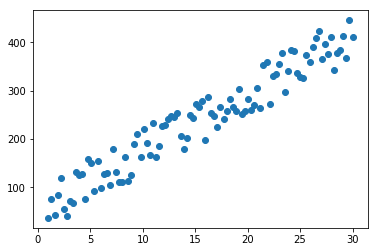

In [4]:
x = np.linspace(1,30, 100)
y = [el * 12 + 4+ random.random() * 100 for el in x]
plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)

In [7]:
reg.coef_

array([12.02094572])

In [8]:
reg.intercept_

54.55692423427024

In [9]:
y_hat = [el * reg.coef_ + reg.intercept_ for el in x]

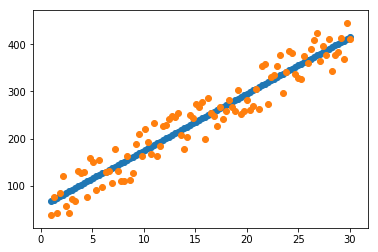

In [10]:
plt.scatter(x, y_hat)
plt.scatter(x, y)

In [11]:
def predict(x):
    return x * reg.coef_ + reg.intercept_

In [12]:
print(12, predict(12))

12 [198.80827287]


#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [13]:
# you code here
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)
def model(x, y):
    return list(zip(x, y))
def predict(x_2, k=5):
    m = model(x, y)
    sorted_m = sorted(m, key=lambda xi: distance(xi[0], x_2))
    print(sorted_m[:k])
    return sum([el[1] for el in sorted_m[:k]]) / k


m = model(x, y)

In [14]:
predict(5.123456, k=5)

[(1.878787878787879, 85.15027339692341), (2.757575757575758, 41.43464189110548), (6.858585858585858, 105.21223745194584), (7.151515151515151, 178.71266020623275), (8.90909090909091, 126.5209498065802)]


107.40615255055755

# 想问一下老师, 这是上课的代码的东西, 为什么这里的distance不用欧氏距离, 而是要用from scipy.spatial.distance import cosine的 $$ 1 - {u ·v / ||u||_2 ||v||_2} $$ , 这个公式的几何意义是什么啊

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [15]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [88]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [89]:
from collections import Counter
def entropy(lis):
    length = len(lis)
    counter = Counter(lis)
    lis  = [counter[el] / length for el in lis]
    return -sum([el * np.log(el) for el in lis])
entropy([1, 1, 1, 1])

-0.0

In [126]:
devide_set = set(dataset.columns)
from collections import deque

In [127]:
def decision_tree(dataset):
    def get_column(data, columns):
        entropy_dic = {}
        for column in columns:
            status = list(set(data[column]))
            sum_entropy = 0
            for i in range(len(status)):
                sum_entropy += entropy(data[data[column] == status[i]])
            entropy_dic[column] = sum_entropy
        entropy_dic = sorted([(k, v) for k, v in entropy_dic.items()], key=lambda x: x[1])
        return entropy_dic[0][0]
    
    dataset = [([], dataset)]  # [([('family_number', 1), ('income', '+10'), ], dataset)]
    finished_dataset = []
    
    while len(dataset):
        dataset_tuple = dataset.pop(-1)  # ([('family_number', 1), ('income', '+10'), ], dataset)
        data = dataset_tuple[1]  # dataset
        column_path = dataset_tuple[0]  # [('family_number', '1'), ('income', '+10'), ]
        
        if devide_set - set([path[0] for path in column_path]) == set():
            finished_dataset.append(dataset_tuple)
            continue
        column = get_column(data, devide_set - set([path[0] for path in column_path]))
        values = set(data[column])
        for value in values:
            sub_data= data[data[column] == value]
            new_column_path = column_path.copy()
            new_column_path.append((column, value))
            new_dataset_tuple = [new_column_path, sub_data]
            if len(sub_data) <= 1:
                finished_dataset.append(new_dataset_tuple)
            else:
                dataset.append(new_dataset_tuple)
    
    temp_set = set()  # [('family_number',), ('family_number', 'gender'), ('family_number', 'income'), ('family_number', 'income', 'bought'), ('family_number', 'income', 'bought', 'gender')]
    for el in [el[0] for el in finished_dataset]:  # [('family_number', 2), ('gender', 'M')]
        lis = [e[0] for e in el]  # ['family_number', 'income', 'bought', 'gender']
        for i in range(len(lis)):
            temp_set.add(tuple(lis[:i + 1]))
            
    return_dict = {}
    temp_set= sorted(list(temp_set), key=lambda x: len(x))
    for el in temp_set:
        sub_return_dict  = return_dict
        for sub_el in el:
            if not sub_el in sub_return_dict:
                sub_return_dict[sub_el] = {}
            sub_return_dict = sub_return_dict[sub_el]
    print(temp_set)
    print(return_dict)
    
decision_tree(dataset)
    
    
    

[('family_number',), ('family_number', 'gender'), ('family_number', 'income'), ('family_number', 'income', 'bought'), ('family_number', 'income', 'bought', 'gender')]
{'family_number': {'gender': {}, 'income': {'bought': {'gender': {}}}}}


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [155]:
from sklearn.cluster import KMeans

In [195]:
X = [random.random() * 20 for _ in range(50)]
X.extend([random.random() * 20 + 25 for _ in range(50)])
random.shuffle(X)
Y = [random.random() * 20 for _ in range(50)]
Y.extend([random.random() * 20 + 25 for _ in range(50)])
random.shuffle(Y)

In [196]:
data = [(x, y) for x, y in zip(X, Y)]

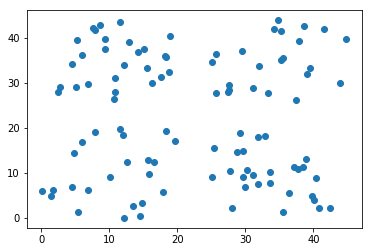

In [197]:
plt.scatter(X, Y)

In [226]:
cluster = KMeans(n_clusters=4, max_iter=1000)

In [227]:
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [228]:
cluster.cluster_centers_

array([[10.62319341,  9.82809159],
       [11.03049918, 35.0503085 ],
       [33.57886244,  9.6224399 ],
       [34.04354163, 34.63310017]])

In [229]:
cluster.labels_

array([1, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 3, 3,
       0, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1,
       0, 1, 0, 3, 1, 3, 2, 2, 3, 3, 0, 3, 3, 0, 2, 0, 1, 0, 1, 0, 0, 3,
       0, 2, 2, 3, 0, 1, 3, 1, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 3, 3, 1, 3, 0, 2, 0, 3, 2, 3, 1])

In [230]:
color = ['red', 'yellow', 'blue', 'green']
label = [0,1,2,3]
color = {k: v for k, v in zip(label, color)}
data_label = {}

In [231]:
for new_data, lable in zip(data, cluster.labels_):
    data_label.setdefault(lable, []).append(new_data)

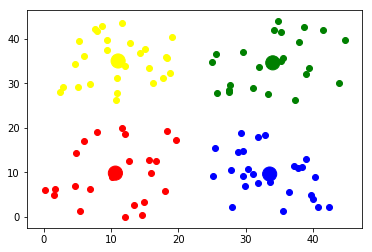

In [232]:
for label, dataset in data_label.items():
    x = [el[0] for el in dataset]
    y = [el[1] for el in dataset]
    plt.scatter(x, y, c=color[label])
centers_x = [el[0] for el in cluster.cluster_centers_]
centers_y = [el[1] for el in cluster.cluster_centers_]
plt.scatter(centers_x, centers_y, c=[v for v in color.values()], s=200)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是一个可以把输入数据转换成输出数据的东西. 因为不存在一个模型可以表示所有的数据

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:过拟合是对训练集的预测准确率过于高, 预测集过于低, 欠拟合在两个数据集都较低, 过拟合原因: 模型过于复杂, 数据量少, 数据集片面, 欠拟合原因: 模型过于简单, 模型训练次数过少

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:precision:tp/所有的预测为t的数据, recall: tp/所有实际为p的数据, AUC: 在presision和recall曲线下面的面积, F1: 2*precision *recall / (precision+ recall), F2score 老师上课没来得及讲

# 老师, precision和recall我这么理解有没有问题啊, 我看这两个的公式表达的其实是这个意思

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:通过一个黑盒子, 让这个黑盒子自动学习输入的数据, 然后以后再输入没有标签或者有标签的数据时, 可以自动判断标签

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

评价标准很重要, 很多结果并不是1比1的, 不能用判断对的比例来评价

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)